# <p style="text-align: center;">EE 379K: Data Science Lab</p>
# <p style="text-align: center;">Lab 5 - 10/9/17</p>
## <p style="text-align: center;">Rachel Chen and Kevin Yee</p>
### <p style="text-align: center;"> rjc2737 and kjy252</p>

<img src="Images/problem1.png">

1. Making Sw
2. Using sklearn
3. how/ WHAT to print??

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from numpy.linalg import inv
%matplotlib inline

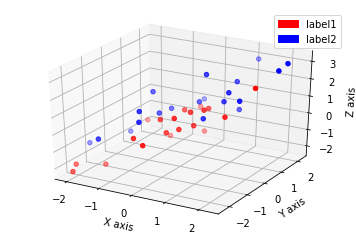

In [249]:
u1_given = [0, 0, 0]
covMatrix1_given = [[1, 0.9, 0.9], [0.9, 1, 0.9], [0.9, 0.9, 1]]

u2_given = [0, 0, 1]
covMatrix2_given = [[1, 0.8, 0.8], [0.8, 1, 0.8], [0.8, 0.8, 1]]

#generate 20 random points from a Gaussian multivariate distribution
x1, y1, z1 = np.random.multivariate_normal(u1_given, covMatrix1_given, 20).T
x2, y2, z2 = np.random.multivariate_normal(u2_given, covMatrix2_given, 20).T

matrix1 = np.column_stack((x1,y1,z1))
matrix2 = np.column_stack((x2,y2,z2))

#plot the 3D plot of the clouds of data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c='r', marker='o')
ax.scatter(x2, y2, z2, c='b', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

red_patch = mpatches.Patch(color='red', label='label1')
blue_patch = mpatches.Patch(color='blue', label='label2')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

LDA: 
- Performs dimensionality reduction while preserving as much of the class disciminatory information as possible
- Smaller variance, good discriminability

- Maximize distance between projected class means
- Minimize projected class variance

LDA:
1. Compute class means
2. Comput w = inverse(Sw)(m2-m1)
3. Project data y = w.T*x

In [264]:
#compute the d-dimensional mean vectors
u1 = np.mean(matrix1, axis = 0)
u2 = np.mean(matrix2, axis = 0)

#compute the scatter matrices
S1 = np.zeros((matrix1.shape[1], matrix1.shape[1]))
for r in range(len(matrix1)):
    S1 += ((matrix1[r]-u1).reshape(3,1)).dot((matrix1[r]-u1).reshape(1,3)) 
S2 = np.zeros((matrix2.shape[1], matrix2.shape[1])) 
for r in range(len(matrix2)):
    S2 += ((matrix2[r]-u2).reshape(3,1)).dot((matrix2[r]-u2).reshape(1,3)) 
    
Sw = S1 + S2
print Sw

#how does (3x1)*(1x3) = (3x3) covariance matrix?

[[ 41.46181509  36.55509969  34.57009368]
 [ 36.55509969  40.33198789  37.10216084]
 [ 34.57009368  37.10216084  42.03966853]]


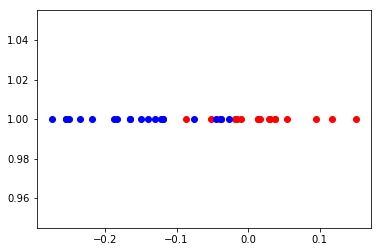

In [291]:
Mdiff = (u1 - u2)

allData = (np.column_stack((np.append(x1, x2), np.append(y1, y2), np.append(z1, z2)))).T

W = inv(Sw).dot(Mdiff)

LDA = W.T.dot(allData)

plt.plot(LDA[:20], 20 * [1], "o", color="red")
plt.plot(LDA[20:], 20 * [1], "o", color="blue")
plt.show()

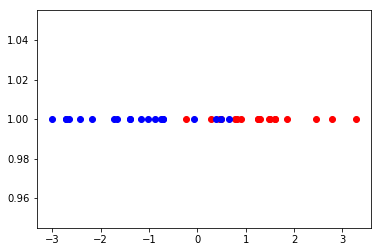

In [295]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

y = []
for i in range(20):
    y.append(2)
for i in range(20):
    y.append(1)    
y = np.asarray(np.matrix(y).T)

lda = LinearDiscriminantAnalysis(n_components=2)
lda_ = lda.fit_transform(allData.T, y)

plt.plot(lda_[:20], 20 * [1], "o", color="red")
plt.plot(lda_[20:], 20 * [1], "o", color="blue")

<img src="Images/problem2.png">

<img src="Images/problem3.png">

<img src="Images/problem4.png">